# Impact of Pathologic Features on PD-L1 and CD8 Expression in Penile Squamous Cell Carcinoma: A Machine Learning Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12.0,8.0)})

df = pd.read_json('data.json')

# Transforming and ordering features
df = df.astype({'subtype':'category','grade':'category','host_response':'category'})
df['subtype'] = df['subtype'].cat.reorder_categories(['Usual','Basaloid','Warty','Warty-Basaloid','Papillary','Verrucous','Sarcomatoid'], ordered=False)
df['grade'] = df['grade'].cat.reorder_categories(['Grade 1','Grade 2','Grade 3'], ordered=True)
df['host_response'] = df['host_response'].cat.reorder_categories(['No','Mild','Moderate','Intense'], ordered=True)

# Functions for exploratory data analysis
%run -i 'scripts.py'

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   n                     528 non-null    int64   
 1   sp                    528 non-null    object  
 2   subtype               528 non-null    category
 3   grade                 504 non-null    category
 4   host_response         504 non-null    category
 5   pdl1_tumor            504 non-null    float64 
 6   pdl1_tumor_location   331 non-null    object  
 7   pdl1_tumor_h          504 non-null    float64 
 8   pdl1_lymph            497 non-null    float64 
 9   cd8_intratumoral      506 non-null    float64 
 10  cd8ki67_intratumoral  506 non-null    float64 
 11  cd8_peritumoral       503 non-null    float64 
 12  cd8ki67_peritumoral   501 non-null    float64 
dtypes: category(3), float64(7), int64(1), object(2)
memory usage: 47.6+ KB


In [3]:
df.head()

,n,sp,subtype,grade,host_response,pdl1_tumor,pdl1_tumor_location,pdl1_tumor_h,pdl1_lymph,cd8_intratumoral,cd8ki67_intratumoral,cd8_peritumoral,cd8ki67_peritumoral
0,0,S06-01500,Warty,Grade 3,Moderate,1.0,Cytoplasmic/Membraneous,1.0,5.0,0.0,0.0,15.0,0.0
1,1,S06-01500,Warty,Grade 3,Mild,30.0,Cytoplasmic/Membraneous,35.0,0.0,0.0,0.0,0.0,0.0
2,2,S06-01500,Warty,Grade 3,Mild,5.0,Cytoplasmic/Membraneous,5.0,5.0,0.0,0.0,0.0,0.0
3,3,S03-06011,Warty-Basaloid,Grade 3,Moderate,2.0,Cytoplasmic/Membraneous,2.0,6.0,37.0,0.0,33.0,0.0
4,4,S03-06011,Warty-Basaloid,Grade 3,Moderate,5.0,Cytoplasmic/Membraneous,5.0,2.0,24.0,0.0,50.0,0.0


# Pathologic features

In [4]:
# Number of pathology cases
df['sp'].nunique()

108

In [5]:
# Number of TMA spots
df.shape[0]

528

## Histologic subtype

In [6]:
df.groupby('subtype')['sp'].nunique().sort_values(ascending=False).to_frame()

,sp
subtype,
Usual,45
Warty-Basaloid,24
Warty,16
Basaloid,11
Papillary,9
Verrucous,2
Sarcomatoid,1


## Histologic grade

In [7]:
df['grade'].value_counts(sort=False).to_frame()

,grade
Grade 1,51
Grade 2,191
Grade 3,262


## Host response

In [8]:
df['host_response'].value_counts(sort=False).to_frame()

,host_response
No,4
Mild,96
Moderate,154
Intense,250


# Association between pathologic features

## Histologic subtype and histologic grade

In [9]:
# Pivot table of subtype by grade
create_pivot('subtype','grade')

grade,Grade 1,Grade 2,Grade 3
subtype,,,
Usual,34,103,57
Basaloid,0,0,64
Warty,1,30,45
Warty-Basaloid,0,28,92
Papillary,13,26,1
Verrucous,3,4,0
Sarcomatoid,0,0,3


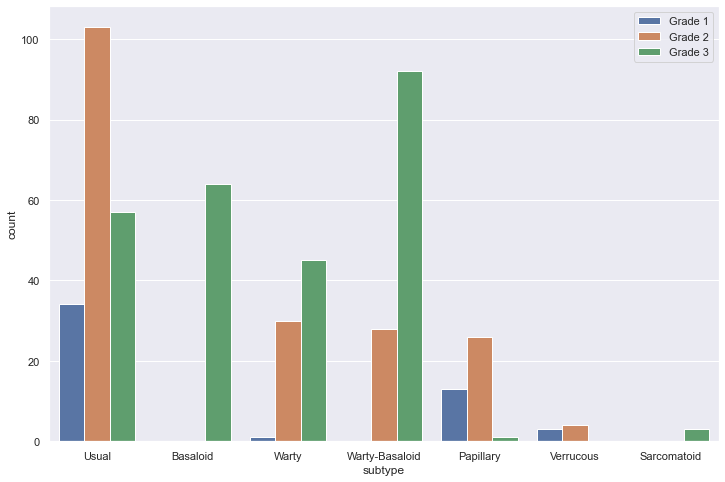

In [10]:
# Barplot of subtype by grade
plot_bar('subtype','grade')
plt.legend(loc='upper right')
plt.show()

In [11]:
# Association between subtype and grade
do_chi2('subtype','grade')

Chi2 statistic: 200.979
Degrees of freedom: 12
P value: 2.04809e-36


## Histologic subtype and host response

In [12]:
# Pivot table of subtype by host response
create_pivot('subtype','host_response')

host_response,No,Mild,Moderate,Intense
subtype,,,,
Usual,0,36,61,95
Basaloid,1,12,17,34
Warty,1,14,21,41
Warty-Basaloid,1,22,41,57
Papillary,1,7,14,18
Verrucous,0,5,0,2
Sarcomatoid,0,0,0,3


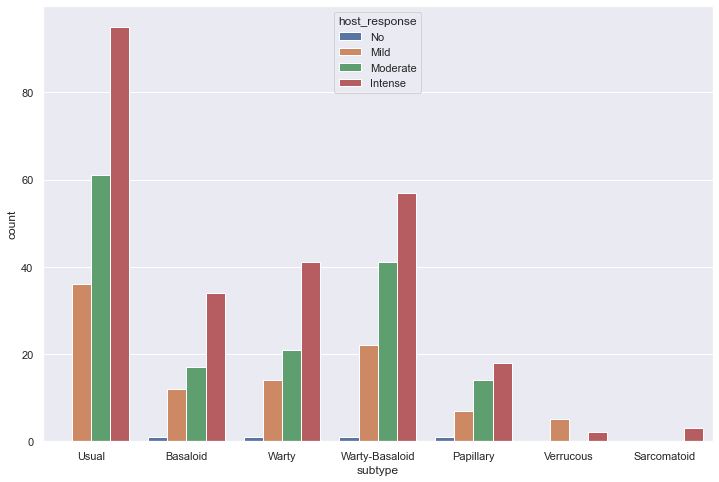

In [13]:
# barplot of subtype by host response
plot_bar('subtype','host_response')

In [14]:
# Association between subtype and host response
do_chi2('subtype','host_response')

Chi2 statistic: 21.8924
Degrees of freedom: 18
P value: 0.236796


## Histologic grade and host response

In [15]:
# Pivot table pf grade by host response
create_pivot('grade','host_response')

host_response,No,Mild,Moderate,Intense
grade,,,,
Grade 1,1,15,18,17
Grade 2,1,36,59,93
Grade 3,2,45,74,137


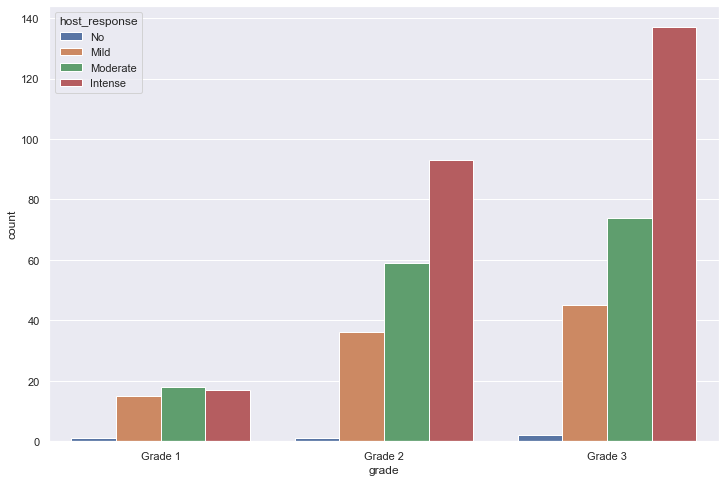

In [16]:
# Barplot of grade by host response
plot_bar('grade','host_response')

In [17]:
# Association between grade and host response
do_chi2('grade','host_response')

Chi2 statistic: 8.26221
Degrees of freedom: 6
P value: 0.219515


# PD-L1 expression
PD-L1 expression was measured in tumor cells (percentage of positive cells and H-score) and in intratumoral lymphocytes (number of positive cells).

## Overall expression

### Tumor cells (%)

In [18]:
create_descriptive('pdl1_tumor')

,pdl1_tumor
count,504.0
mean,26.0
std,34.0
min,0.0
25%,0.0
50%,5.0
75%,40.0
max,100.0


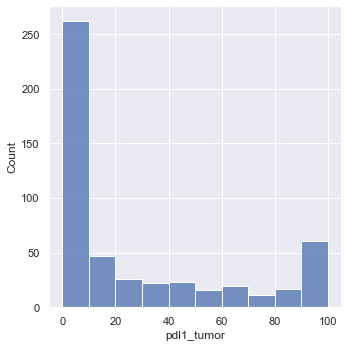

In [19]:
plot_kde('pdl1_tumor')

In [20]:
pdl1_tumor_pos1 = df['pdl1_tumor'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
pdl1_tumor_pos1.value_counts(normalize=True).to_frame()

,pdl1_tumor
Positive,0.626894
Negative,0.373106


In [21]:
df['pdl1_tumor_location'].value_counts(normalize=True).to_frame()

,pdl1_tumor_location
Cytoplasmic/Membraneous,0.755287
Cytplasmic,0.244713


### Intratumoral lymphocytes

In [22]:
create_descriptive('pdl1_lymph')

,pdl1_lymph
count,497.0
mean,7.0
std,10.0
min,0.0
25%,1.0
50%,5.0
75%,10.0
max,70.0


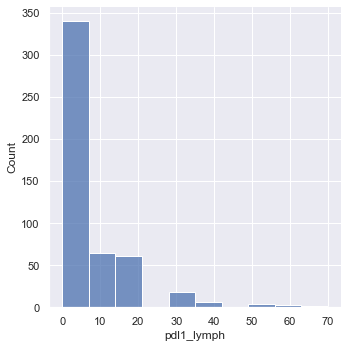

In [23]:
plot_kde('pdl1_lymph')

### Tumor cells vs intratumoral lymphocytes

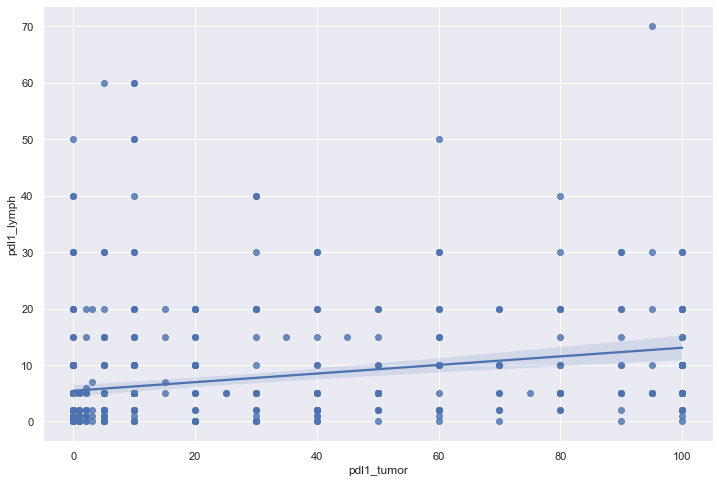

In [24]:
sns.regplot(data=df, x='pdl1_tumor', y='pdl1_lymph')
plt.show()

In [25]:
do_spearman_rho(['pdl1_tumor','pdl1_lymph'])

,pdl1_tumor,pdl1_lymph
pdl1_tumor,0.47,0.47
pdl1_lymph,0.47,0.47


In [26]:
do_spearman_p(['pdl1_tumor','pdl1_lymph'])

,pdl1_tumor,pdl1_lymph
pdl1_tumor,2.545391e-29,2.545391e-29
pdl1_lymph,2.545391e-29,2.545391e-29


## By pathologic features

### Histologic subtype

In [27]:
create_descriptives('pdl1_tumor','subtype')

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Usual,192.0,25.0,35.0,0.0,0.0,5.0,50.0,100.0
Basaloid,64.0,32.0,32.0,0.0,0.0,25.0,50.0,100.0
Warty,77.0,15.0,23.0,0.0,0.0,5.0,20.0,90.0
Warty-Basaloid,121.0,37.0,39.0,0.0,2.0,20.0,80.0,100.0
Papillary,40.0,1.0,4.0,0.0,0.0,0.0,0.0,20.0
Verrucous,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sarcomatoid,3.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0


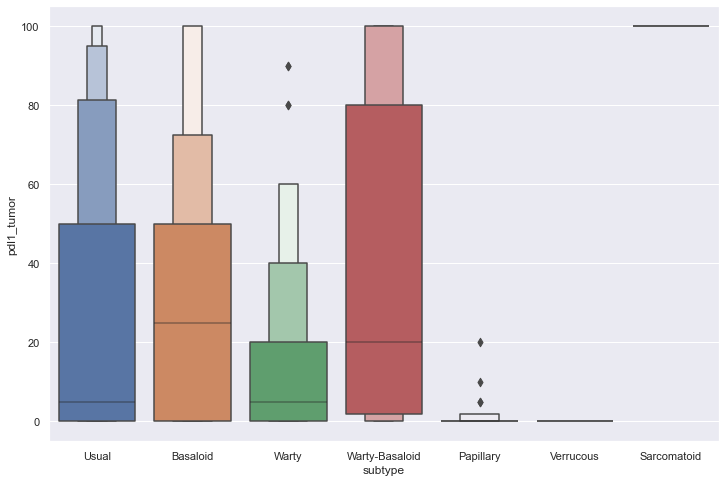

In [28]:
plot_box('pdl1_tumor','subtype')

In [29]:
do_kw('pdl1_tumor','subtype')

Kruskal-Wallis statistic: 77.2567
P value: 1.31578e-14


In [30]:
create_descriptives('pdl1_lymph','subtype')

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Usual,192.0,9.0,12.0,0.0,1.0,5.0,10.0,70.0
Basaloid,63.0,9.0,12.0,0.0,2.0,5.0,10.0,60.0
Warty,75.0,6.0,9.0,0.0,0.0,5.0,6.0,40.0
Warty-Basaloid,120.0,6.0,8.0,0.0,1.0,5.0,10.0,50.0
Papillary,37.0,3.0,4.0,0.0,0.0,2.0,5.0,20.0
Verrucous,7.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
Sarcomatoid,3.0,18.0,10.0,10.0,12.0,15.0,22.0,30.0


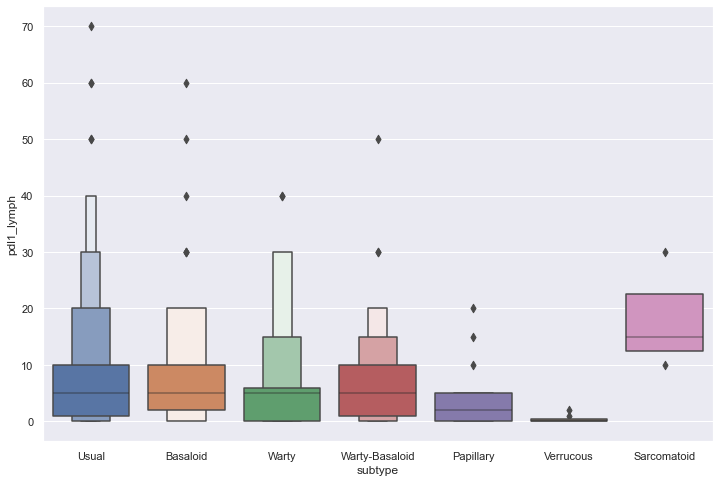

In [31]:
plot_box('pdl1_lymph','subtype')

In [32]:
do_kw('pdl1_lymph','subtype')

Kruskal-Wallis statistic: 29.7604
P value: 4.36519e-05


### Histologic grade

In [33]:
create_descriptives('pdl1_tumor','grade')

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
Grade 1,51.0,8.0,21.0,0.0,0.0,0.0,5.0,90.0
Grade 2,189.0,21.0,34.0,0.0,0.0,1.0,30.0,100.0
Grade 3,258.0,32.0,36.0,0.0,1.0,15.0,60.0,100.0


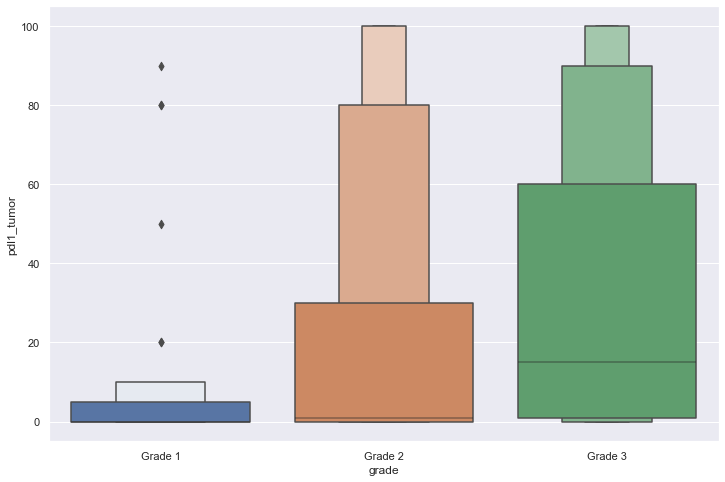

In [34]:
plot_box('pdl1_tumor','grade')

In [35]:
do_kw('pdl1_tumor','grade')

Kruskal-Wallis statistic: 45.0078
P value: 1.6853e-10


In [36]:
create_descriptives('pdl1_lymph','grade')

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
Grade 1,48.0,9.0,14.0,0.0,1.0,2.0,6.0,60.0
Grade 2,187.0,6.0,9.0,0.0,0.0,2.0,8.0,60.0
Grade 3,256.0,8.0,11.0,0.0,1.0,5.0,10.0,70.0


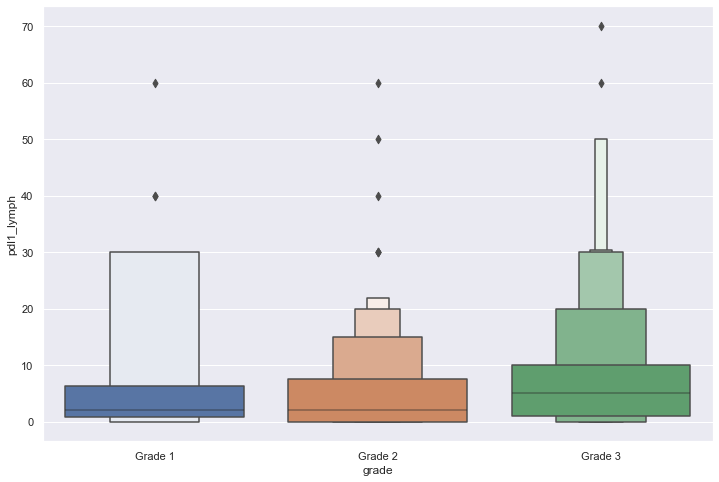

In [37]:
plot_box('pdl1_lymph','grade')

In [38]:
do_kw('pdl1_lymph','grade')

Kruskal-Wallis statistic: 8.57222
P value: 0.0137584


### Host response

In [39]:
create_descriptives('pdl1_tumor','host_response')

,count,mean,std,min,25%,50%,75%,max
host_response,,,,,,,,
No,4.0,25.0,50.0,0.0,0.0,0.0,25.0,100.0
Mild,96.0,16.0,27.0,0.0,0.0,1.0,20.0,100.0
Moderate,154.0,19.0,30.0,0.0,0.0,2.0,20.0,100.0
Intense,250.0,34.0,37.0,0.0,0.0,15.0,60.0,100.0


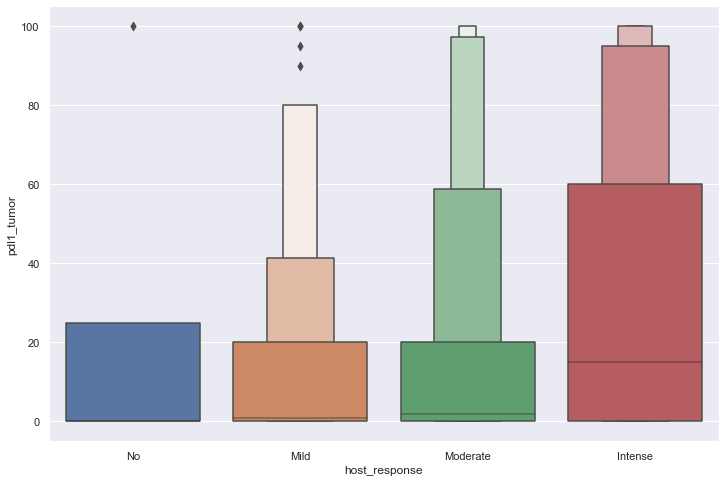

In [40]:
plot_box('pdl1_tumor','host_response')

In [41]:
do_kw('pdl1_tumor','host_response')

Kruskal-Wallis statistic: 26.7672
P value: 6.58739e-06


In [42]:
create_descriptives('pdl1_lymph','host_response')

,count,mean,std,min,25%,50%,75%,max
host_response,,,,,,,,
No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mild,93.0,4.0,10.0,0.0,0.0,1.0,2.0,70.0
Moderate,154.0,4.0,5.0,0.0,1.0,2.0,5.0,30.0
Intense,250.0,11.0,12.0,0.0,2.0,5.0,15.0,60.0


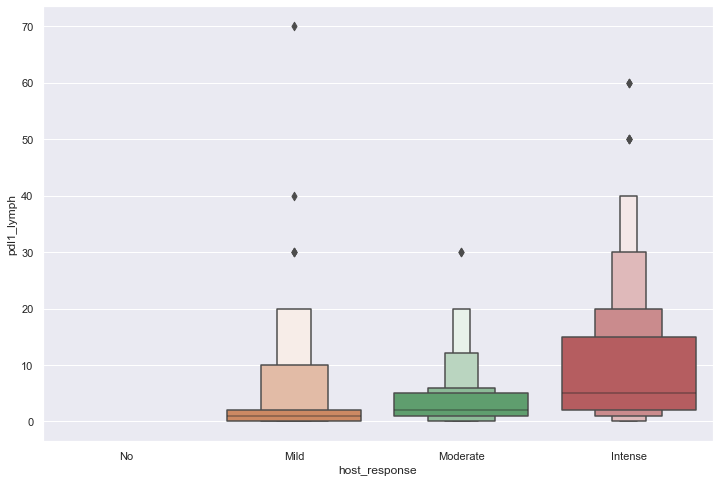

In [43]:
plot_box('pdl1_lymph','host_response')

In [44]:
do_kw('pdl1_lymph','host_response')

Kruskal-Wallis statistic: 89.7395
P value: 2.49182e-19


## Impact of pathologic features

### PD-L1 in tumor cells

In [45]:
get_all_scores('pdl1_tumor', LinearRegression())

Variance explained by ['subtype']: 13.4973
Variance explained by ['grade']: 3.5085
Variance explained by ['host_response']: 6.52007
Variance explained by ['subtype', 'grade']: 9.01939
Variance explained by ['host_response', 'grade']: 9.56603
Variance explained by ['subtype', 'host_response']: 19.9779
Variance explained by ['subtype', 'grade', 'host_response']: 16.2733


### PD-L1 in intratumoral lymphocytes

In [46]:
get_all_scores('pdl1_lymph', LinearRegression())

Variance explained by ['subtype']: 4.09562
Variance explained by ['grade']: 2.50952
Variance explained by ['host_response']: 11.2489
Variance explained by ['subtype', 'grade']: 5.60741
Variance explained by ['host_response', 'grade']: 14.162
Variance explained by ['subtype', 'host_response']: 13.9136
Variance explained by ['subtype', 'grade', 'host_response']: 16.3493


# CD8 expression

## Overall expression

### Intratumoral lymphocytes

In [47]:
create_descriptive('cd8_intratumoral')

,cd8_intratumoral
count,506.0
mean,10.0
std,16.0
min,0.0
25%,0.0
50%,4.0
75%,12.0
max,120.0


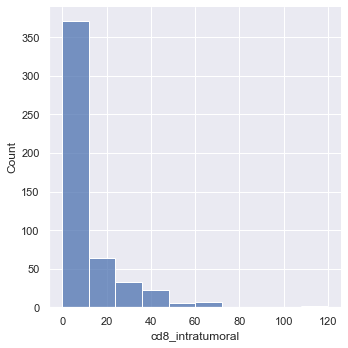

In [48]:
plot_kde('cd8_intratumoral')

### Peritumoral lymphocytes

In [49]:
create_descriptive('cd8_peritumoral')

,cd8_peritumoral
count,503.0
mean,27.0
std,27.0
min,0.0
25%,5.0
50%,19.0
75%,40.0
max,150.0


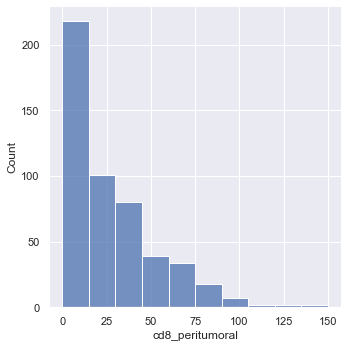

In [50]:
plot_kde('cd8_peritumoral')

### Intratumoral lymphocytes vs. peritumoral lymphocytes

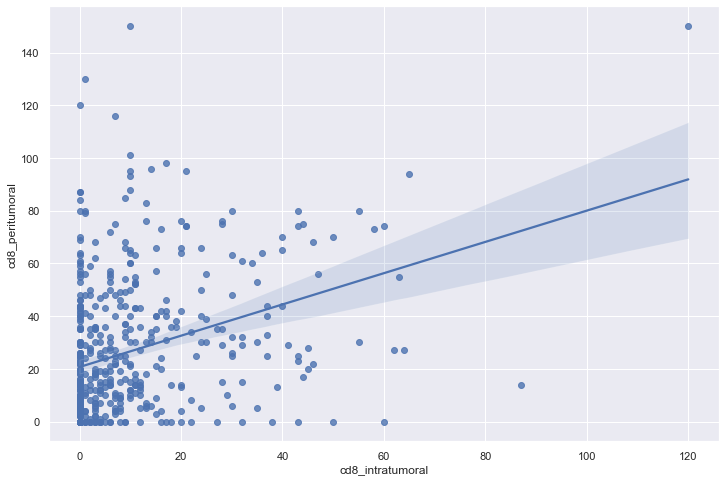

In [51]:
sns.regplot(x='cd8_intratumoral', y='cd8_peritumoral', data=df)
plt.show()

In [52]:
do_spearman_rho(['cd8_intratumoral','cd8_peritumoral'])

,cd8_intratumoral,cd8_peritumoral
cd8_intratumoral,0.37,0.37
cd8_peritumoral,0.37,0.37


In [53]:
do_spearman_p(['cd8_intratumoral','cd8_peritumoral'])

,cd8_intratumoral,cd8_peritumoral
cd8_intratumoral,1.982031e-17,1.982031e-17
cd8_peritumoral,1.982031e-17,1.982031e-17


## By pathologic features

### Histologic subtype

In [54]:
create_descriptives('cd8_intratumoral','subtype')

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Usual,197.0,12.0,19.0,0.0,0.0,6.0,16.0,120.0
Basaloid,62.0,11.0,15.0,0.0,1.0,6.0,12.0,60.0
Warty,78.0,5.0,12.0,0.0,0.0,2.0,5.0,65.0
Warty-Basaloid,117.0,11.0,14.0,0.0,0.0,6.0,16.0,63.0
Papillary,42.0,6.0,8.0,0.0,0.0,4.0,9.0,32.0
Verrucous,7.0,2.0,3.0,0.0,0.0,0.0,2.0,9.0
Sarcomatoid,3.0,5.0,2.0,3.0,4.0,6.0,6.0,7.0


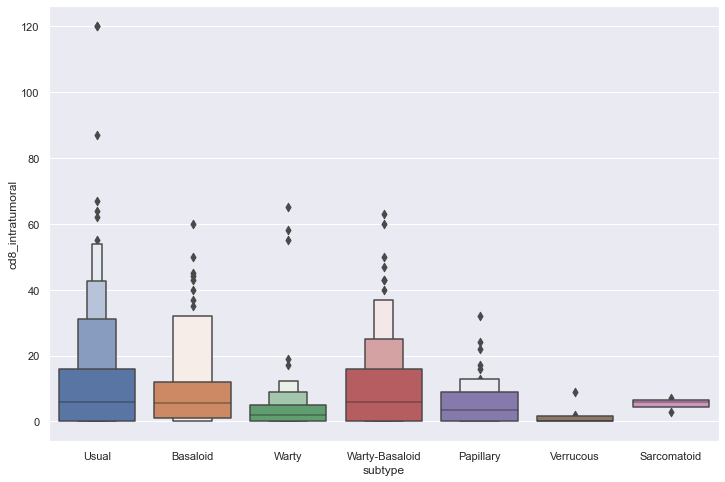

In [55]:
plot_box('cd8_intratumoral','subtype')

In [56]:
do_kw('cd8_intratumoral','subtype')

Kruskal-Wallis statistic: 22.9353
P value: 0.000818443


In [57]:
create_descriptives('cd8_peritumoral','subtype')

,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Usual,198.0,29.0,29.0,0.0,7.0,22.0,43.0,150.0
Basaloid,59.0,25.0,20.0,0.0,10.0,19.0,36.0,75.0
Warty,78.0,22.0,25.0,0.0,0.0,14.0,34.0,101.0
Warty-Basaloid,116.0,27.0,27.0,0.0,4.0,20.0,42.0,116.0
Papillary,42.0,28.0,30.0,0.0,1.0,20.0,43.0,98.0
Verrucous,7.0,14.0,13.0,0.0,0.0,23.0,24.0,26.0
Sarcomatoid,3.0,12.0,6.0,5.0,10.0,14.0,16.0,17.0


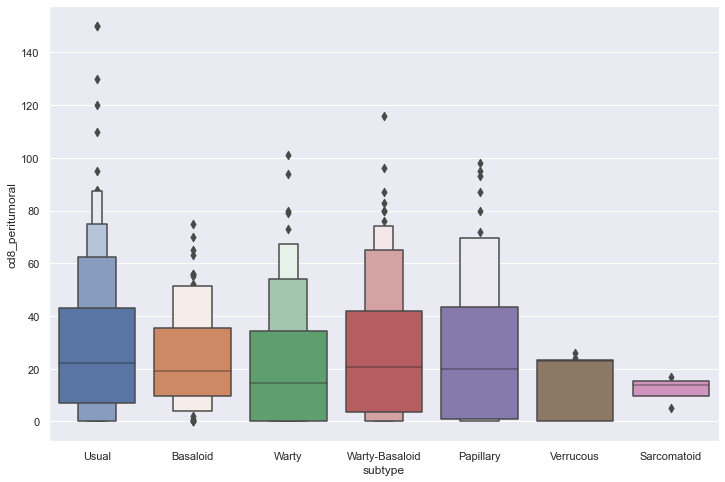

In [58]:
plot_box('cd8_peritumoral','subtype')

In [59]:
do_kw('cd8_peritumoral','subtype')

Kruskal-Wallis statistic: 7.42373
P value: 0.283431


### Histologic grade

In [60]:
create_descriptives('cd8_intratumoral','grade')

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
Grade 1,50.0,6.0,10.0,0.0,0.0,1.0,9.0,46.0
Grade 2,188.0,8.0,12.0,0.0,0.0,2.0,10.0,58.0
Grade 3,256.0,13.0,18.0,0.0,1.0,6.0,15.0,120.0


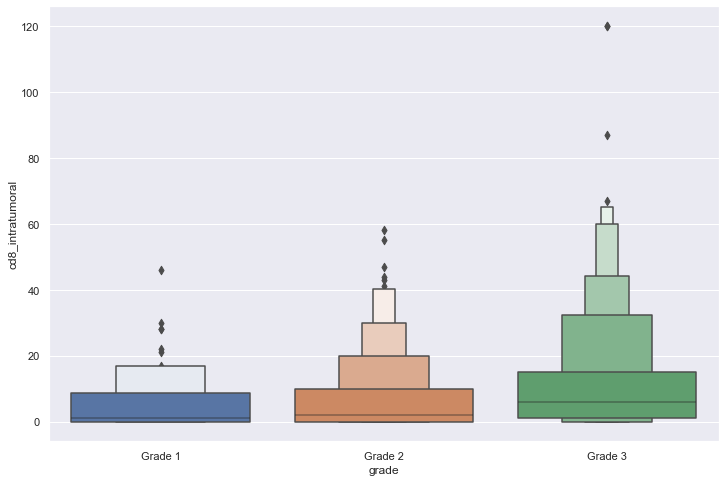

In [61]:
plot_box('cd8_intratumoral','grade')

In [62]:
do_kw('cd8_intratumoral','grade')

Kruskal-Wallis statistic: 23.1739
P value: 9.28663e-06


In [63]:
create_descriptives('cd8_peritumoral','grade')

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
Grade 1,50.0,26.0,23.0,0.0,7.0,24.0,40.0,95.0
Grade 2,190.0,28.0,30.0,0.0,4.0,16.0,44.0,150.0
Grade 3,245.0,25.0,24.0,0.0,5.0,19.0,40.0,150.0


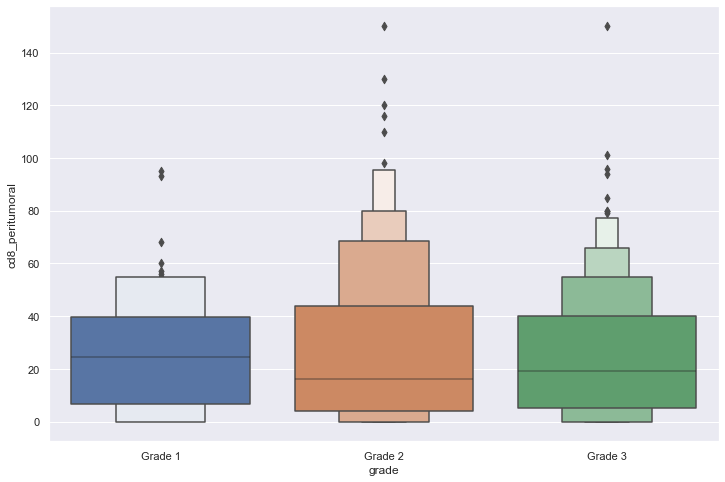

In [64]:
plot_box('cd8_peritumoral','grade')

In [65]:
do_kw('cd8_peritumoral','grade')

Kruskal-Wallis statistic: 0.170261
P value: 0.918392


### Host response

In [66]:
create_descriptives('cd8_intratumoral','host_response')

,count,mean,std,min,25%,50%,75%,max
host_response,,,,,,,,
No,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mild,96.0,5.0,9.0,0.0,0.0,2.0,5.0,46.0
Moderate,151.0,7.0,12.0,0.0,0.0,2.0,10.0,62.0
Intense,243.0,14.0,19.0,0.0,1.0,8.0,20.0,120.0


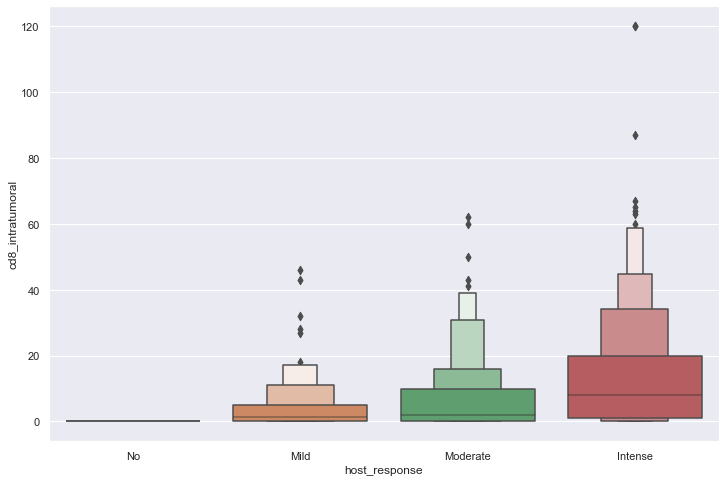

In [67]:
plot_box('cd8_intratumoral','host_response')

In [68]:
do_kw('cd8_intratumoral','host_response')

Kruskal-Wallis statistic: 46.5498
P value: 4.33289e-10


In [69]:
create_descriptives('cd8_peritumoral','host_response')

,count,mean,std,min,25%,50%,75%,max
host_response,,,,,,,,
No,3.0,6.0,11.0,0.0,0.0,0.0,10.0,19.0
Mild,88.0,9.0,13.0,0.0,0.0,4.0,12.0,64.0
Moderate,152.0,19.0,20.0,0.0,4.0,12.0,27.0,93.0
Intense,242.0,38.0,29.0,0.0,15.0,32.0,56.0,150.0


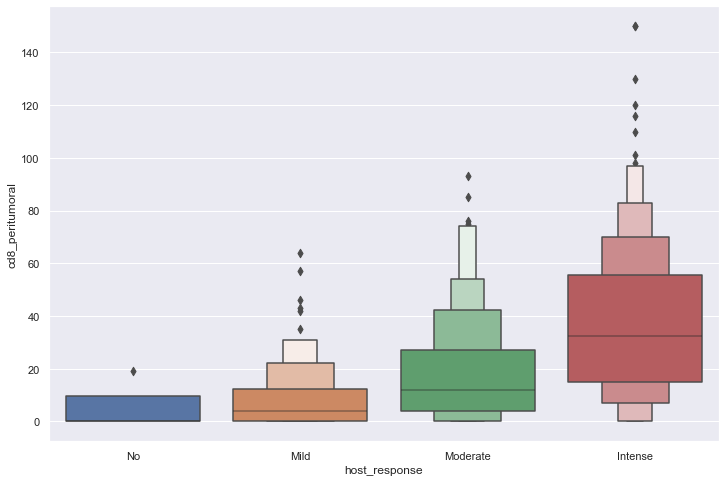

In [70]:
plot_box('cd8_peritumoral','host_response')

In [71]:
do_kw('cd8_peritumoral','host_response')

Kruskal-Wallis statistic: 115.481
P value: 7.25283e-25


## Impact of pathologic features

### CD8 in intratumoral lymphocytes

In [72]:
get_all_scores('cd8_intratumoral',LinearRegression())

Variance explained by ['subtype']: 7.74533
Variance explained by ['grade']: -5.00625
Variance explained by ['host_response']: 15.0271
Variance explained by ['subtype', 'grade']: 5.3277
Variance explained by ['host_response', 'grade']: 11.1305
Variance explained by ['subtype', 'host_response']: 19.4128
Variance explained by ['subtype', 'grade', 'host_response']: 18.735


In [73]:
get_all_scores('cd8_peritumoral',LinearRegression())

Variance explained by ['subtype']: 0.352473
Variance explained by ['grade']: 0.151825
Variance explained by ['host_response']: 21.1009
Variance explained by ['subtype', 'grade']: -0.00935259
Variance explained by ['host_response', 'grade']: 22.9877
Variance explained by ['subtype', 'host_response']: 20.4234
Variance explained by ['subtype', 'grade', 'host_response']: 21.1611
